In [123]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

breast_cancer_data = load_breast_cancer()

df_data = pd.DataFrame(breast_cancer_data.data,columns=breast_cancer_data.feature_names)

df_labels = pd.DataFrame(breast_cancer_data.target)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=3)
#결측치 계산
#X_train.dropna(how='any') 하나만 결측치 일때
X_train.dropna(how='all')#모든값이 결측치일때 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.1782,0.3841,0.5754,0.18720,0.3258,0.09720
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.3538,0.15710,0.3206,0.06938
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.20,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234
329,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,...,17.73,25.21,113.70,975.2,0.1426,0.2116,0.3344,0.10470,0.2736,0.07953
201,17.54,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,20.42,25.84,139.50,1239.0,0.1381,0.3420,0.3508,0.19390,0.2928,0.07867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,0.06284,...,13.34,27.87,88.83,547.4,0.1208,0.2279,0.1620,0.05690,0.2406,0.07729
422,11.61,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.04497,0.1886,0.06320,...,12.64,19.67,81.93,475.7,0.1415,0.2170,0.2302,0.11050,0.2787,0.07427
119,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,...,20.58,27.83,129.20,1261.0,0.1072,0.1202,0.2249,0.11850,0.4882,0.06111
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.5329,0.4251,0.19410,0.2818,0.10050


In [124]:
df_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [132]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
#X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))
std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.9035
모델의 정확도 : 0.9123


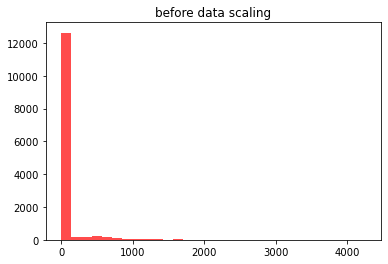

In [126]:
#standardScaler()
X_train_data = X_train.values.reshape(13650,1)
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()


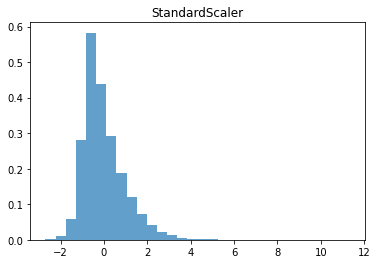

In [127]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

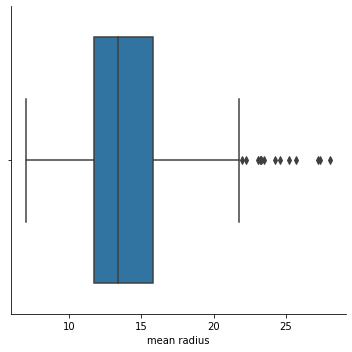

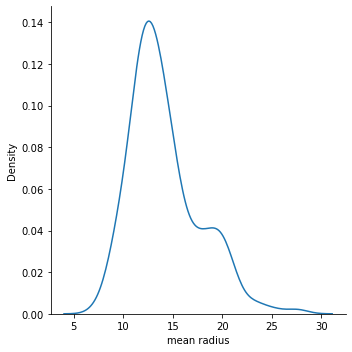

In [128]:
sns.catplot(kind='box',x='mean radius',data=df_data)
sns.displot(kind='kde',x='mean radius',data=df_data)

In [129]:
from sklearn.preprocessing import MinMaxScaler
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))
mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.3509
모델의 정확도 : 0.8947
